<a href="https://colab.research.google.com/github/seansothey/ANZ-Virtual-Internship/blob/master/ANZ_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Model

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load the dataset
df = pd.read_csv("/content/customers_salary.csv")

In [4]:
df

,customer_id,first_name,age,gender,avg_monthly_salary,avg_monthly_expense,annual_expense,annual_salary
0,CUS-1005756958,Stephanie,53,F,4205.37,1401.79,16821.48,50464.44
1,CUS-1117979751,Lucas,21,M,8350.18,2783.39,33400.73,100202.20
2,CUS-1140341822,Dustin,28,M,3833.02,1277.67,15332.08,45996.24
3,CUS-1147642491,Robin,34,F,7416.02,2472.01,29664.09,88992.28
4,CUS-1196156254,Jessica,34,F,9108.70,3036.23,36434.81,109304.44
...,...,...,...,...,...,...,...,...
95,CUS-72755508,Kimberly,35,F,2901.28,967.09,11605.12,34815.36
96,CUS-809013380,Kaitlyn,21,F,4493.97,1497.99,17975.88,53927.64
97,CUS-860700529,Jeffrey,30,M,3617.24,1205.75,14468.96,43406.88
98,CUS-880898248,Robert,26,M,2867.96,955.99,11471.84,34415.52


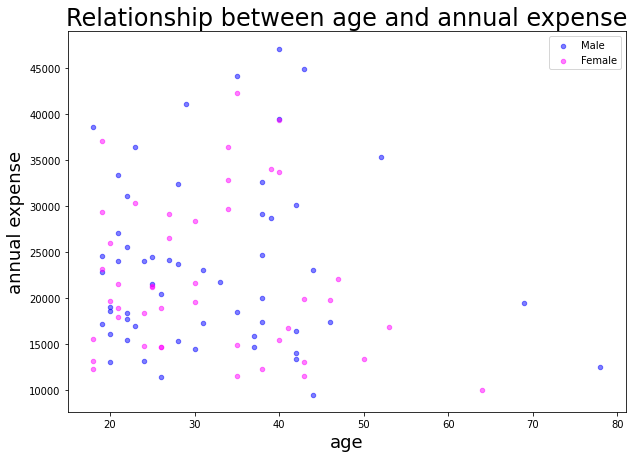

In [5]:
# Scatter plot age VS annual_expense

ax1 = df[df['gender'] == 'M'].plot(kind='scatter', x='age', y='annual_expense', color='blue', alpha=0.5, figsize=(10, 7))
df[df['gender'] == 'F'].plot(kind='scatter', x='age', y='annual_expense', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Male', 'Female'])
plt.title('Relationship between age and annual expense', size=24)
plt.xlabel('age', size=18)
plt.ylabel('annual expense', size=18);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb261928828>,
      dtype=object)

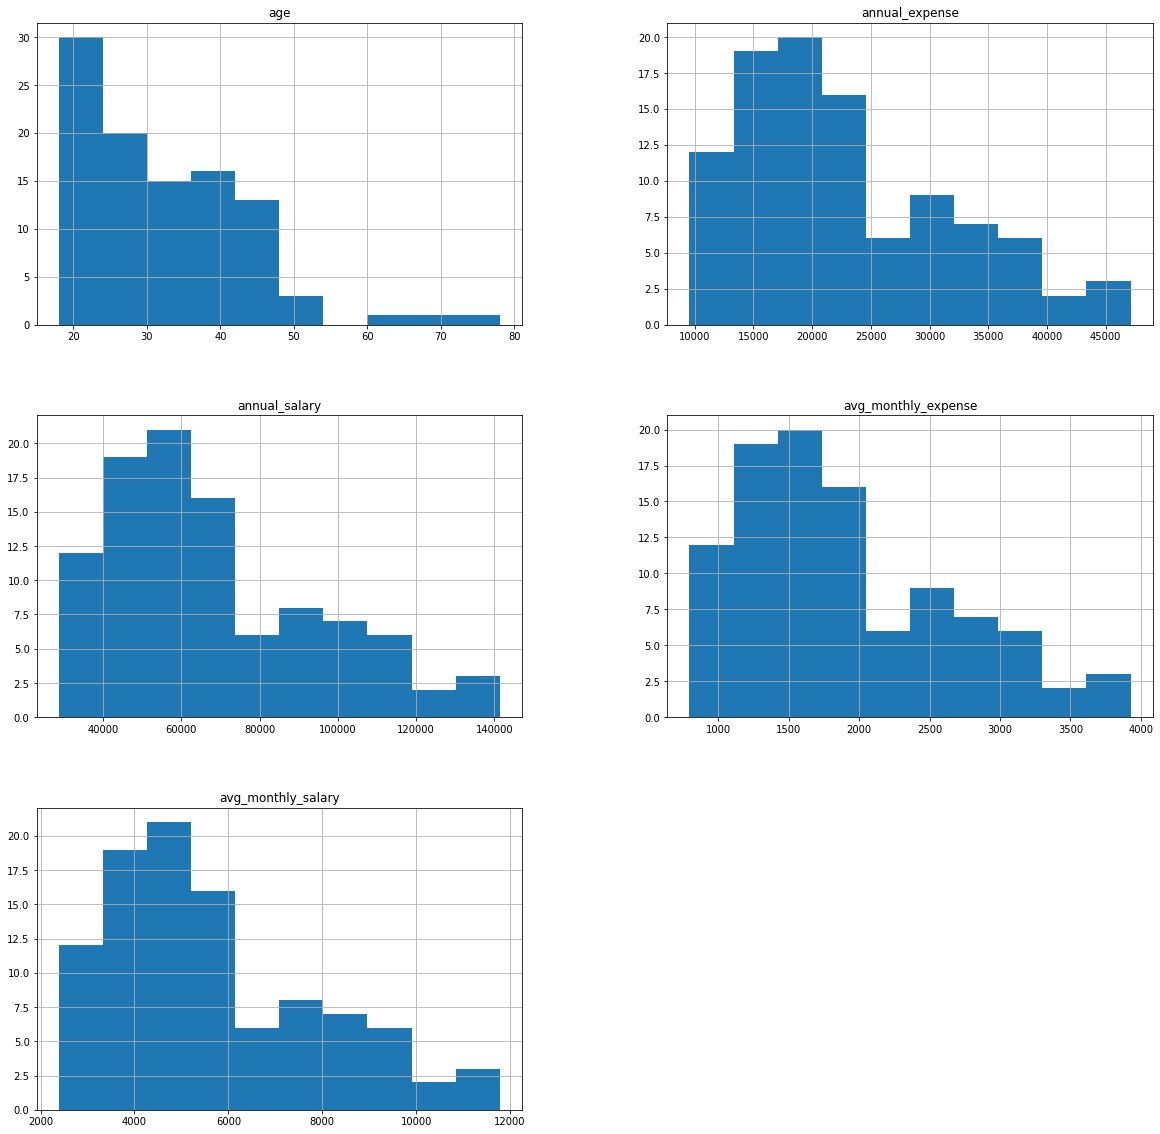

In [6]:
#See the data distribution
df.hist(figsize=(20,20))

In [7]:
df.drop(columns=['customer_id', 'first_name', 'gender'], inplace=True)

In [8]:
# create X and y
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [9]:
X

,age,avg_monthly_salary,avg_monthly_expense,annual_expense
0,53,4205.37,1401.79,16821.48
1,21,8350.18,2783.39,33400.73
2,28,3833.02,1277.67,15332.08
3,34,7416.02,2472.01,29664.09
4,34,9108.70,3036.23,36434.81
...,...,...,...,...
95,35,2901.28,967.09,11605.12
96,21,4493.97,1497.99,17975.88
97,30,3617.24,1205.75,14468.96
98,26,2867.96,955.99,11471.84


In [10]:
y

0      50464.44
1     100202.20
2      45996.24
3      88992.28
4     109304.44
        ...    
95     34815.36
96     53927.64
97     43406.88
98     34415.52
99    111368.88
Name: annual_salary, Length: 100, dtype: float64

In [11]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)

In [12]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.05],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [50,100,300,500],
              'max_depth'    : [4,6,8] 
              }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1, )
grid.fit(X_train, y_train)    

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [13]:
best_model = grid.best_estimator_
print(best_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [14]:
best_model.score(X_test, y_test)

0.9977593019631552

In [15]:
y_pred = best_model.predict(X_test)

In [16]:
salary = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
salary

,Actual,Predicted
83,59810.24,60005.291602
53,97314.48,97969.008268
70,55068.16,55111.760958
45,39379.92,39592.061245
44,102070.20,101197.029752
39,36986.88,36762.502747
22,61538.96,60477.808485
80,40357.92,40134.932806
10,106001.84,110038.089455
0,50464.44,50309.941734


#Decision Tree Model


In [17]:
# import libraries

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

In [18]:
# convert y labels to category

y_train = pd.cut(x=y_train, bins=[0, 50000, 75000, 100000, 200000], labels=['0-50K', '50-75K', '75-100K', '100K+'])
y_test = pd.cut(x=y_test, bins=[0, 50000, 75000, 100000, 200000], labels=['0-50K', '50-75K', '75-100K', '100K+'])

In [19]:
y_train

55      0-50K
88     50-75K
26    75-100K
42     50-75K
69      0-50K
       ...   
60     50-75K
71      0-50K
14    75-100K
92     50-75K
51      0-50K
Name: annual_salary, Length: 80, dtype: category
Categories (4, object): [0-50K < 50-75K < 75-100K < 100K+]

In [20]:
# build the decision tree model

def DT_GridSearchCV(X,y):
    #create a dictionary of all values we want to test
    param_grid = {
                  'ccp_alpha' : np.arange(0, 0.2, 0.01),
                  'criterion':['gini','entropy'],
                  #'max_depth': np.arange(4, 40, 2),
                  'splitter' : ['best', 'random'],
                  'max_features' : ['None', 'auto', 'sqrt', 'log2'],
                  'min_weight_fraction_leaf' : np.arange(0, 1, 0.1),
                  'class_weight' : ['None', 'balanced'],
                  'random_state' : np.arange(0, 101, 10)
                  }
    #decision tree model
    model_DT = DecisionTreeClassifier()
    #use gridsearch to test all values
    model_gs = GridSearchCV(model_DT, param_grid, cv=5, verbose=0, n_jobs=-1)
    #fit model with data
    model_gs.fit(X, y)
    return model_gs.best_estimator_

In [21]:

best_model = DT_GridSearchCV(X_train, y_train)

In [22]:
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


In [23]:
best_model.score(X_test, y_test)

1.0

[Text(446.40000000000003, 380.52, 'annual_expense <= 33115.881\ngini = 0.75\nsamples = 80\nvalue = [20.0, 20.0, 20.0, 20.0]\nclass = 75-100K'),
 Text(334.8, 271.8, 'avg_monthly_salary <= 6344.755\ngini = 0.667\nsamples = 69\nvalue = [20.0, 0.0, 20.0, 20.0]\nclass = 75-100K'),
 Text(223.20000000000002, 163.07999999999998, 'annual_expense <= 16609.2\ngini = 0.5\nsamples = 57\nvalue = [20.0, 0.0, 20.0, 0.0]\nclass = 75-100K'),
 Text(111.60000000000001, 54.360000000000014, 'gini = 0.0\nsamples = 22\nvalue = [20.0, 0.0, 0.0, 0.0]\nclass = 0-50K'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 35\nvalue = [0.0, 0.0, 20.0, 0.0]\nclass = 75-100K'),
 Text(446.40000000000003, 163.07999999999998, 'gini = -0.0\nsamples = 12\nvalue = [0, 0, 0, 20]\nclass = 100K+'),
 Text(558.0, 271.8, 'gini = -0.0\nsamples = 11\nvalue = [0.0, 20.0, 0.0, 0.0]\nclass = 50-75K')]

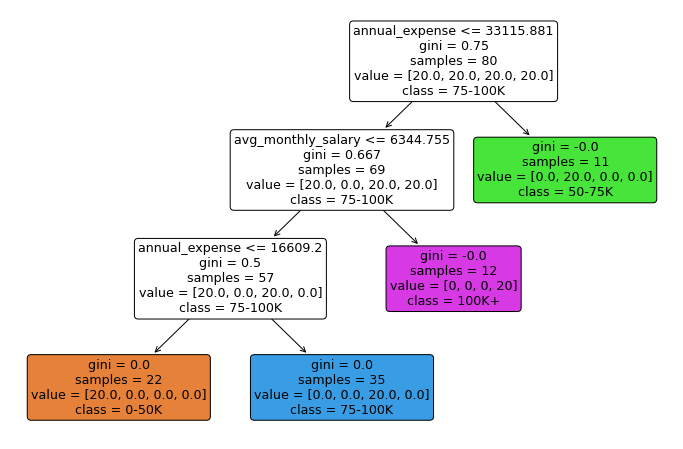

In [25]:
# plot the decision tree after pruning 
plt.figure(figsize=(12, 8))
plot_tree(best_model,
          filled=True,
          rounded=True,
          class_names=['0-50K', '50-75K', '75-100K', '100K+'],
          feature_names=X.columns)